In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

**LOGISTIC REGRESSION & LDA :**

**You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.**

**Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
from google.colab import files
uploaded = files.upload()

Saving Holiday_Package.csv to Holiday_Package.csv


In [112]:
import io
holiday=pd.read_csv(io.BytesIO(uploaded['Holiday_Package.csv']))

**EDA :**

HEAD :

In [113]:
holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


TAIL :

In [114]:
holiday.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [115]:
holiday.shape

(872, 8)

DATA TYPES :

In [116]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


DATA DESCRIPTION :

In [117]:
holiday.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


CHECKING NULL VALUES :

In [118]:
holiday.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

CHECKING DUPLICATES :

In [119]:
dups=holiday.duplicated().sum()
dups

0

REMOVE UNWANTED COLUMNS :

In [120]:
holiday.drop('Unnamed: 0',axis=1,inplace=True)

In [121]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


UNIVARIATE ANALYSIS :

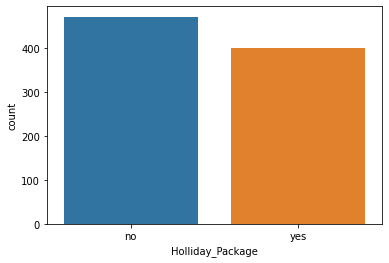

In [122]:
sns.countplot(x='Holliday_Package',data=holiday)

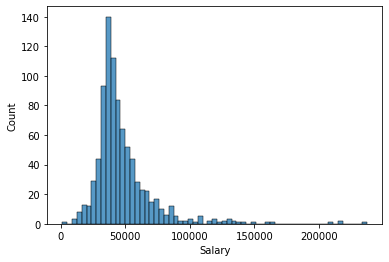

In [123]:
sns.histplot(x='Salary',data=holiday);

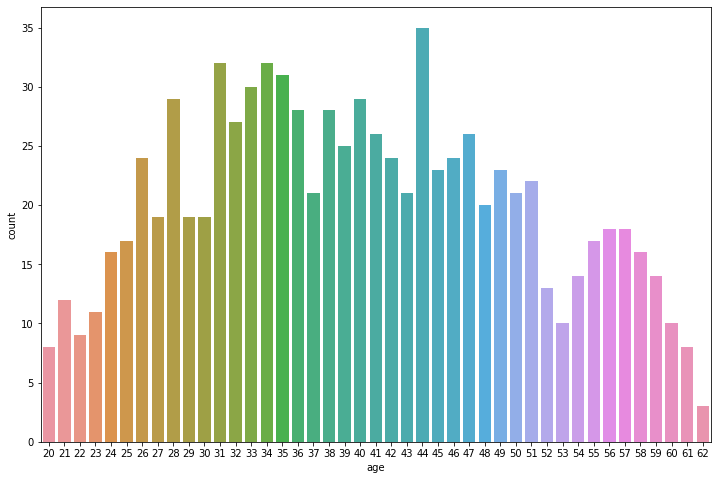

In [124]:
plt.figure(figsize=(12,8))
sns.countplot(x='age',data=holiday);

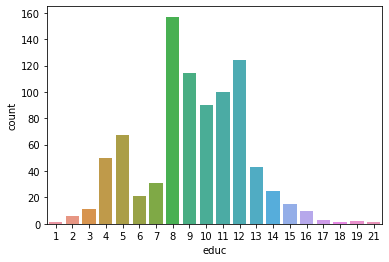

In [125]:
sns.countplot(x='educ',data=holiday);

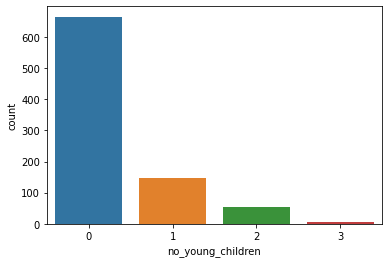

In [126]:
sns.countplot(x='no_young_children',data=holiday)

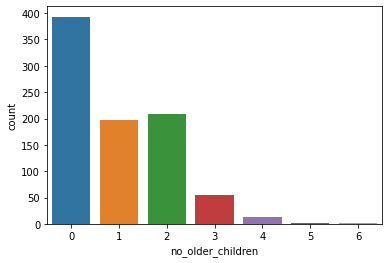

In [127]:
sns.countplot(x='no_older_children',data=holiday)

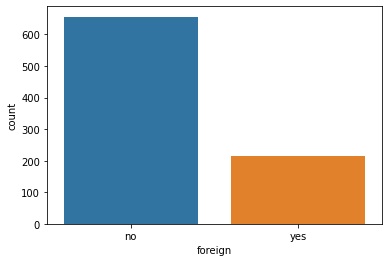

In [128]:
sns.countplot(x='foreign',data=holiday)

**BIVARIATE ANALYSIS :**

SALARY VS HOLIDAY _PACKAGE :

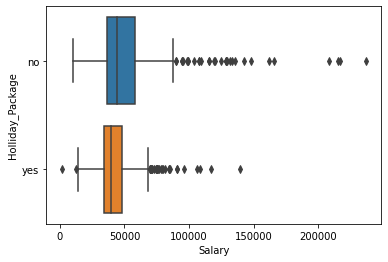

In [129]:
sns.boxplot(x='Salary',y='Holliday_Package',data=holiday);

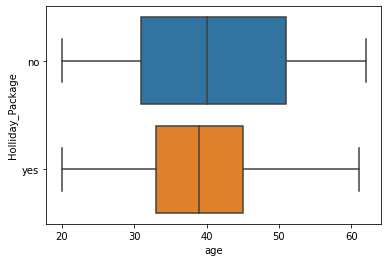

In [130]:
sns.boxplot(y='Holliday_Package',x='age',data=holiday);

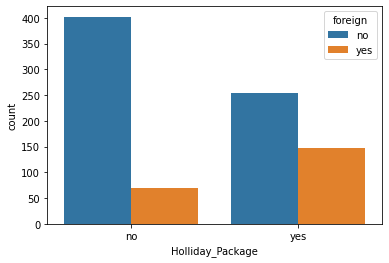

In [131]:
sns.countplot(x='Holliday_Package',hue='foreign',data=holiday);

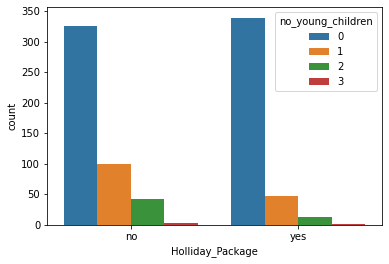

In [132]:
sns.countplot(x='Holliday_Package',hue='no_young_children',data=holiday);

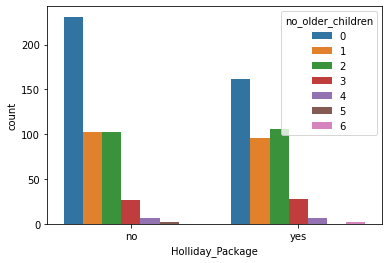

In [133]:
sns.countplot(x='Holliday_Package',hue='no_older_children',data=holiday);

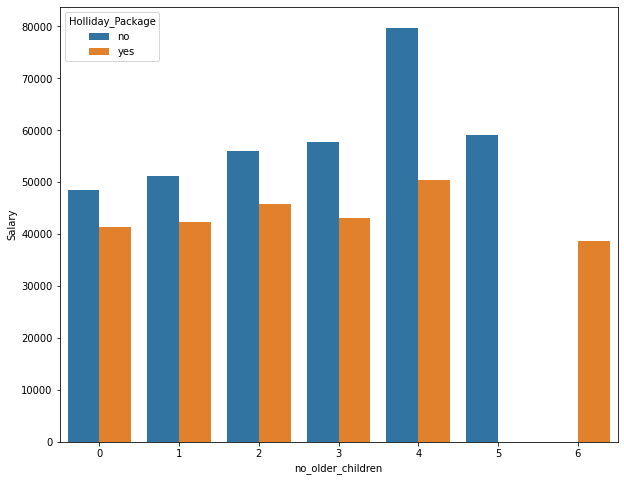

In [134]:
plt.figure(figsize=(10,8))
sns.barplot(y='Salary',hue='Holliday_Package',x='no_older_children',data=holiday,ci=False);

DATA DISTRIBUTION :

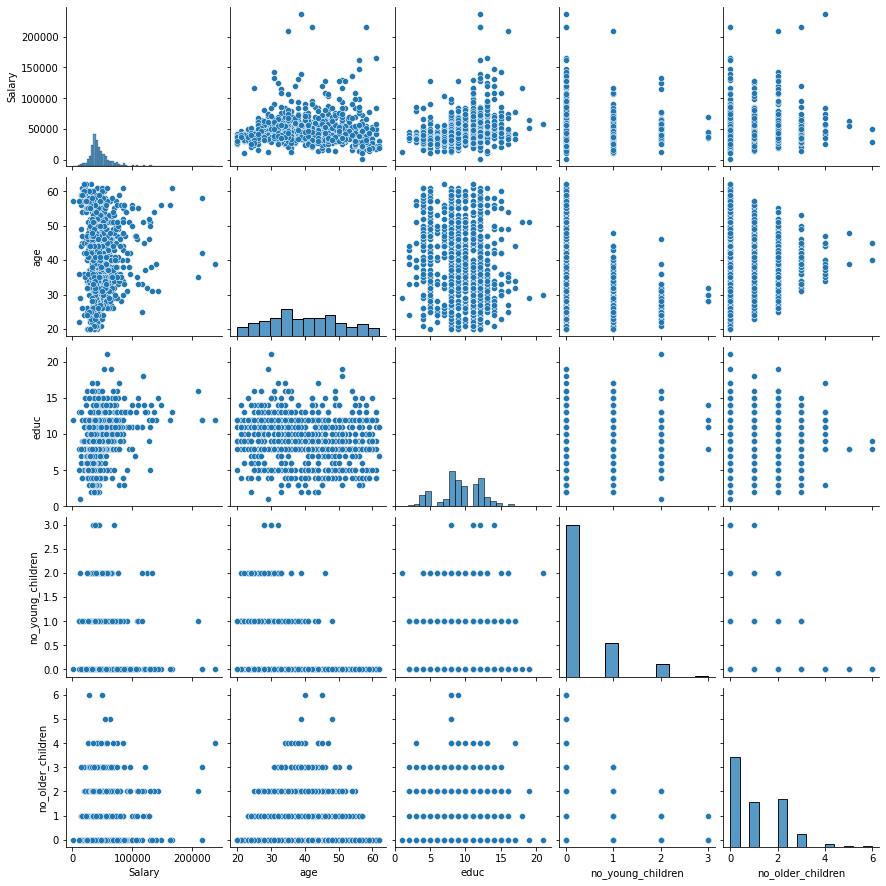

In [135]:
sns.pairplot(data=holiday);

CORRELATION MAP :

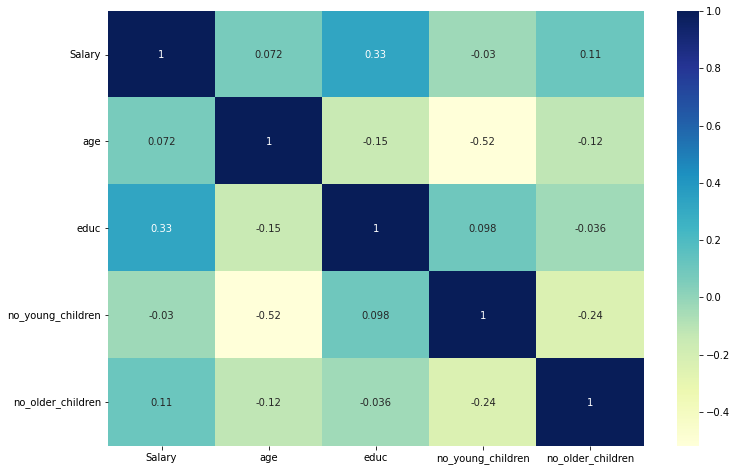

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(holiday.iloc[:,0:7].corr(),cmap='YlGnBu',annot=True)
plt.show()

INFERENCES :

1)There is high chance for them to take the package if the employee salary is between 35k to 50 k.

2) There Is a higher chance of taking up the package if the employee age is between age of 35 to 45 years.After 50 years there is less chance for accepting. 

3) If the employee has no young children then there is huge chance to accept.

4) If employee is a foreigner there is a huge chance to accept the package

CHECKING OUTLIERS :

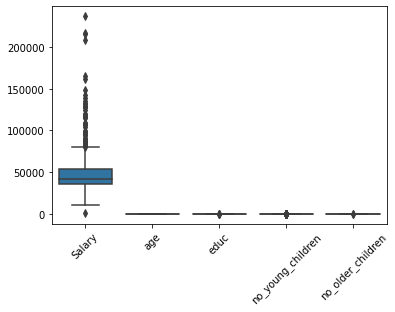

In [137]:
sns.boxplot(data=holiday)
plt.xticks(rotation=45);

Except Age all other column has outliers .But we need treat outliers in salary column only.

In [138]:
def detect_outlier(col):
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range
lr,ur=detect_outlier(holiday['Salary'])
holiday['Salary']=np.where(holiday['Salary']>ur,ur,holiday['Salary'])
holiday['Salary']=np.where(holiday['Salary']<lr,lr,holiday['Salary'])

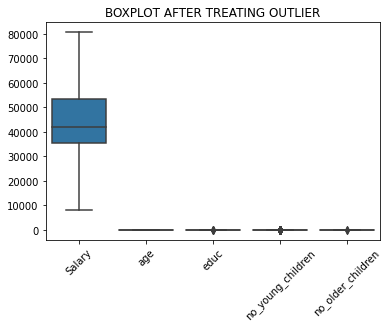

In [139]:
sns.boxplot(data=holiday)
plt.title('BOXPLOT AFTER TREATING OUTLIER')
plt.xticks(rotation=45);

UNIQUE VALUES :

In [140]:
holiday['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [141]:
holiday['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [142]:
holiday['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [143]:
holiday['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

**Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).**

In [144]:
hp=pd.get_dummies(holiday,columns=['Holliday_Package','foreign'],drop_first=True)
hp

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30,8,1,1,0,0
1,37207.0,45,8,0,1,1,0
2,58022.0,46,9,0,0,0,0
3,66503.0,31,11,2,0,0,0
4,66734.0,44,12,0,2,0,0
...,...,...,...,...,...,...,...
867,40030.0,24,4,2,1,0,1
868,32137.0,48,8,0,0,1,1
869,25178.0,24,6,2,0,0,1
870,55958.0,41,10,0,1,1,1


SPLIT THE DATA :

In [145]:
 X= hp.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
Y = hp[['Holliday_Package_yes']]

In [146]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
type(X_train)

pandas.core.frame.DataFrame

**LOGISTIC REGRESSION :**

In [147]:
model1= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model1.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [148]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

In [149]:
# Accuracy - Training Data
model1.score(X_train, Y_train)

0.6655737704918033

In [150]:
model1.score(X_test, Y_test)

0.6679389312977099

In [151]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       331
           1       0.65      0.58      0.61       279

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610



**LDA :**

In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
clf=LinearDiscriminantAnalysis()
model2=clf.fit(X,Y.values.ravel())
model2

LinearDiscriminantAnalysis()

**Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.**

**PERFORMANCE MATRIX FOR LOGISTIC REGRESSION :**

Predicting Training and Testing Dataset :

In [153]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

Getting the predicted class and probos:

In [154]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.524591,0.475409
1,0.665670,0.334330
2,0.472240,0.527760
3,0.486721,0.513279
4,0.180269,0.819731


MODEL EVALUATION :

In [155]:
# Accuracy - Training Data
print('Accuracy score for Logistic Regression Train variables', model1.score(X_train, Y_train))

Accuracy score for Logistic Regression Train variables 0.6655737704918033


In [156]:
# Accuracy - Test Data
print('Accuracy score for Logistic Regression Test variables', model1.score(X_test, Y_test))

Accuracy score for Logistic Regression Test variables 0.6679389312977099


CONFUSION MATRIX :

In [157]:
confusion_matrix(Y_train, ytrain_predict)

array([[245,  86],
       [118, 161]])

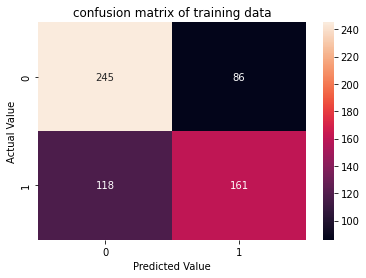

In [158]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_train,ytrain_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('confusion matrix of training data')
plt.show()

In [159]:
confusion_matrix(Y_test,ytest_predict)

array([[110,  30],
       [ 57,  65]])

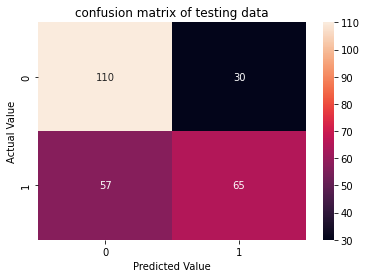

In [160]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,ytest_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('confusion matrix of testing data')
plt.show()

In [161]:
print(metrics.classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       331
           1       0.65      0.58      0.61       279

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610



In [162]:
print(metrics.classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       140
           1       0.68      0.53      0.60       122

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262



**ROC CURVE FOR TRAINING & TESTING DATA :**

AUC for the LOG REG Training Data: 0.736
AUC for the LOG REG Test Data: 0.717


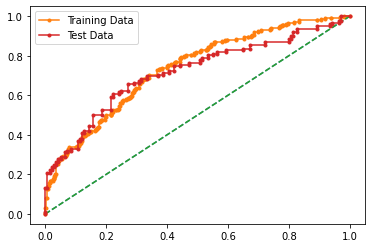

In [163]:
# AUC and ROC for the training data

# calculate AUC
probs = model1.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(Y_train,probs)

print('AUC for the LOG REG Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
probs1 = model1.predict_proba(X_test)
probs1= probs1[:, 1]
auc = metrics.roc_auc_score(Y_test,probs1)
print('AUC for the LOG REG Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**PERFORMANCE MATRIX FOR LDA :**

In [164]:
#intercept value
clf.intercept_

array([2.45710355])

In [165]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-2.08822144e-05, -4.93139931e-02,  3.69376865e-02,
        -1.23627401e+00, -1.71900773e-02,  1.34619870e+00]])

In [166]:
X_train.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign_yes'],
      dtype='object')


Prediction for the training and test data :

In [167]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model2.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model2.predict(X_test)

In [168]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.  , -0.05,  0.04, -1.24, -0.02,  1.35]])

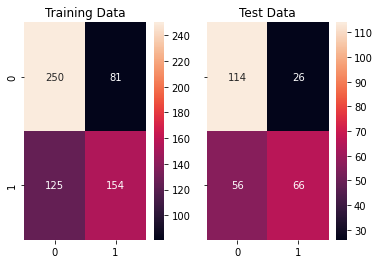

In [169]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

CLASSIFICATION REPORT :

In [170]:
print('Classification Report of the LDA training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the LDA test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the LDA training data:

               precision    recall  f1-score   support

           0       0.67      0.76      0.71       331
           1       0.66      0.55      0.60       279

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the LDA test data:

               precision    recall  f1-score   support

           0       0.67      0.81      0.74       140
           1       0.72      0.54      0.62       122

    accuracy                           0.69       262
   macro avg       0.69      0.68      0.68       262
weighted avg       0.69      0.69      0.68       262
 



PREDICTION PROBABILITY FOR TRAINING AND TESTING DATA :

In [171]:
# Training Data Probability Prediction
pred_prob_train = model2.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model2.predict_proba(X_test)

In [172]:
pred_prob_train[:,1]

array([0.56452029, 0.24061161, 0.25550416, 0.55174778, 0.69491118,
       0.73220594, 0.36669935, 0.12567432, 0.34106463, 0.61943648,
       0.78066955, 0.24799687, 0.04777291, 0.88284597, 0.21345577,
       0.38436947, 0.68050503, 0.48641556, 0.55527581, 0.2280955 ,
       0.52356865, 0.34160748, 0.19353344, 0.64809049, 0.25627827,
       0.8503624 , 0.30676457, 0.32154479, 0.32865568, 0.19042302,
       0.53644986, 0.51138849, 0.2569927 , 0.32123123, 0.09490258,
       0.53215274, 0.73020775, 0.34189183, 0.73075322, 0.61514033,
       0.69332248, 0.47608217, 0.20987644, 0.57423464, 0.49046794,
       0.37139142, 0.2119117 , 0.32538591, 0.40420733, 0.40943233,
       0.39476179, 0.61452408, 0.56974126, 0.19613927, 0.2844946 ,
       0.28918983, 0.43611662, 0.47542646, 0.58899434, 0.31999186,
       0.29766771, 0.69673617, 0.76213061, 0.50597615, 0.39818244,
       0.60922656, 0.45875024, 0.22396285, 0.77042661, 0.60468492,
       0.28992483, 0.30709822, 0.2850388 , 0.1756406 , 0.44680

AUC for the LDA Training Data: 0.728
AUC for the LDA Test Data: 0.722


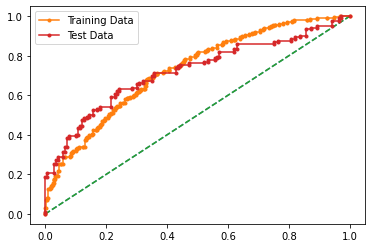

In [173]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the LDA Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the LDA Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

COMPARISON :

AUC for the LOG REG Training Data: 0.736
AUC for the LDA Training Data: 0.728


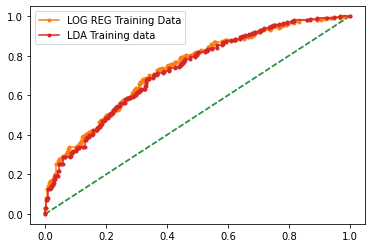

In [174]:
# AUC and ROC for the LOG REG training data

# calculate AUC
probs = model1.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(Y_train,probs)

print('AUC for the LOG REG Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LOG REG Training Data')


# AUC and ROC for LDA training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the LDA Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LDA Training data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the LOG REG Testing Data: 0.717
AUC for the LDA Testing Data: 0.722


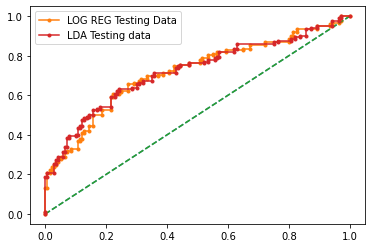

In [175]:
# AUC and ROC for the LOG REG testing data

# calculate AUC
probs = model1.predict_proba(X_test)
probs = probs[:, 1]
auc = metrics.roc_auc_score(Y_test,probs)

print('AUC for the LOG REG Testing Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LOG REG Testing Data')


# AUC and ROC for LDA training data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the LDA Testing Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'LDA Testing data')
# show the plot
plt.legend(loc='best')
plt.show()

**LDA EQUATION :**

**LDA = 2.45 -0.0000208(Salary) - 0.05 (age) + 0.04 (educ) - 1.24 (no_young_children) - 0.02 (no_older_children) + 1.35 (foreign_yes)**

**INFERENCES :**

1.Based on comparison of Performance Metrics , LDA looks better because it has better RECALL rate and ACCURACY when compared with Logistic Regression.So LDA is the best model.

2.With 70 percent (approx.) accuracy , LDA model can predict whether an employee will opt for the package or not.

3.Important factors which determine whether an employee opt for the package are Salary , Age , No_young_children, Foreign.

4.Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the LDA model is a good model for classification